In [1]:
!pip install scikit-learn
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
def load_dataset():
  df = pd.read_csv('https://storage.googleapis.com/qwasar-public/track-ds/boston.csv')
  return df

boston_dataframe = load_dataset()

In [4]:
def print_summarize_dataset(dataset):
   print("Dataset dimension:")
   print(dataset.shape)
   print("\nFirst 10 rows of dataset:")
   print(dataset.head(10))
   print("\nStatistical summary:")
   print(dataset.describe())

print_summarize_dataset(boston_dataframe)

Dataset dimension:
(506, 14)

First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  

In [5]:
def clean_dataset(df):
  return df.dropna()

clean_dataset(boston_dataframe)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


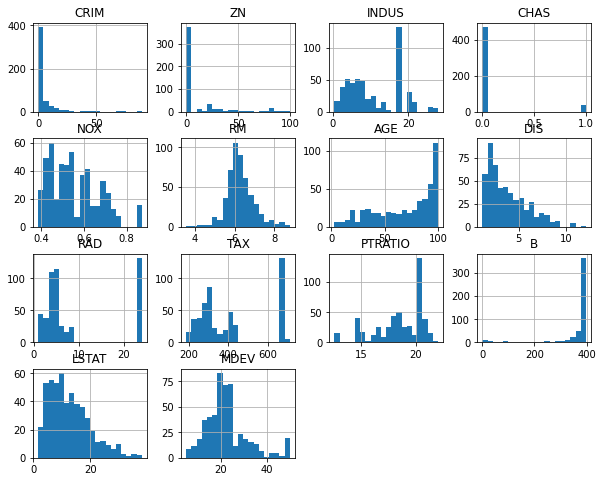

In [6]:
def print_histograms(df):
  df.hist(figsize=(10, 8), bins=20)
  plt.show()

print_histograms(boston_dataframe)

In [7]:
def compute_correlations_matrix(df):
    return df.corr()

correlations = compute_correlations_matrix(boston_dataframe)

print(correlations['MDEV'])

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


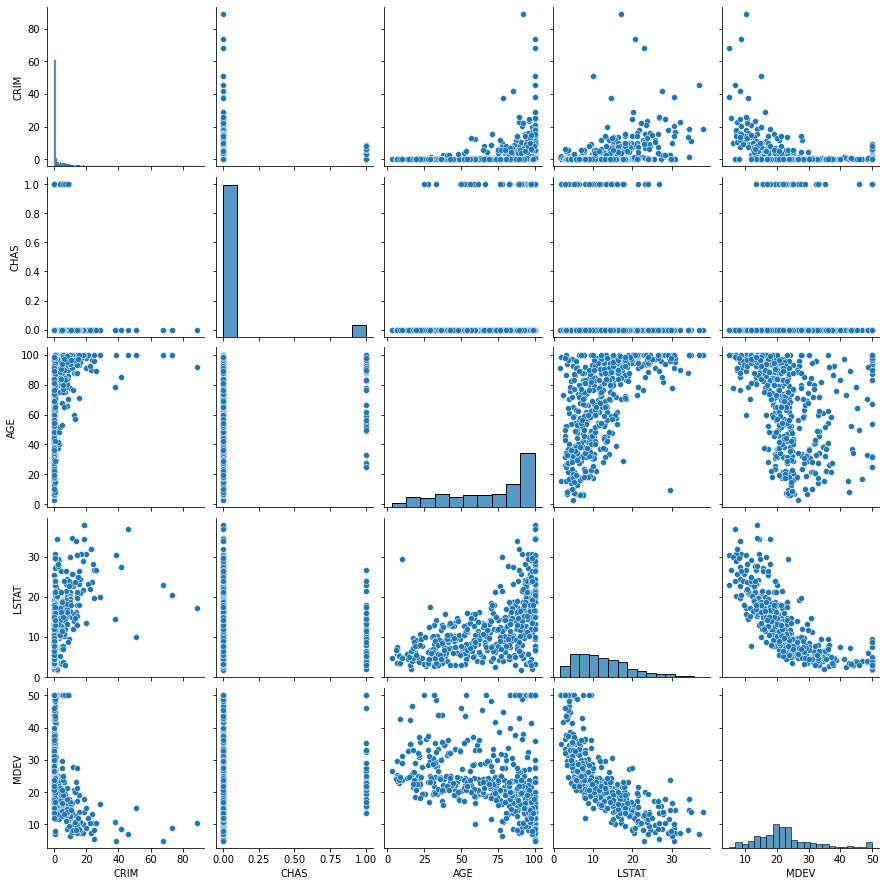

In [8]:
def print_scatter_matrix(df):
    sns.pairplot(data=df[['CRIM', 'CHAS', 'AGE', 'LSTAT', 'MDEV']])
    plt.show()

print_scatter_matrix(boston_dataframe)

In [13]:
def boston_fit_model(boston_dataframe):
  train_set, test_set = train_test_split(boston_dataframe, test_size=0.10, random_state=25) 
  # SELECT two columns from our
  model_dataset = train_set[["RM","MDEV"]]
  regressor = sklearn.linear_model.LinearRegression()
  # Extract column 1
  x = np.asanyarray(model_dataset.iloc[:, :-1].values)
  # Extract column 2
  y = np.asanyarray(model_dataset.iloc[:, 1].values)
  # Train the model
  regressor.fit(x, y)
  return regressor

def boston_predict(estimator, array_to_predict):
  predicted = estimator.predict(np.asanyarray(array_to_predict[['RM']]))
  return predicted

train_set, test_set = train_test_split(boston_dataframe, test_size=0.10, random_state=25) 

estimator = boston_fit_model(boston_dataframe)
print(boston_predict(estimator, test_set))

[19.63511674 20.86622742 23.76126112  6.80463517 20.5488317  23.37653903
 27.06025301 19.60626259 23.42462929 36.03389567 17.97119372 21.44331055
 19.4427557  20.9912621  27.57962782 18.32706165 25.78105207  4.07310836
 16.72084694 24.45376087 19.8851861  25.81952428 25.7137257  29.15698838
 18.56751295 22.09733809 35.59146527 19.4427557  22.97258084 21.11629677
 25.02122595 25.4925105  15.8648403  -3.68865973 20.76042884 21.98192147
 17.4518189  22.16466446 32.39827195 21.37598418 17.27869396 24.70383023
 26.97369054 17.8750132  27.29108626 25.22320504 19.29848492 20.40456091
 31.7057722  14.518313   17.68265216]


In [ ]:
dataset = load_dataset()

# Analysis
print_summarize_dataset(dataset)
clean_dataset(dataset)
print_histograms(dataset)
compute_correlations_matrix(dataset)
print_scatter_matrix(dataset)

# Prediction
boston_fit_model(dataset)
boston_predict(estimator, test_set)

In [12]:
def print_model_prediction_evaluator(base_test, prediction):
  print('Mean Absolute Error:', metrics.mean_absolute_error(base_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(base_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(base_test, prediction)))

print_model_prediction_evaluator(test_set['RM'], boston_predict(estimator, test_set))

Mean Absolute Error: 15.678223874117185
Mean Squared Error: 273.31151367181536
Root Mean Squared Error: 16.532135786758328
